In [ ]:
import pandas as pd
import os

# Folder where your CSVs are stored
base_path = "/Users/dishasharma/Documents/Coding/SIT225/Task 8.1P/"

# File list (Update these names if needed)
files = [
    ("accelerometer_data_20250409_001313.csv", "A"),
    ("accelerometer_data_20250409_001413.csv", "A"),
    ("accelerometer_data_20250409_001513.csv", "A"),
    ("accelerometer_data_20250409_001613.csv", "B"),
    ("accelerometer_data_20250409_001713.csv", "B"),
    ("accelerometer_data_20250409_001813.csv", "B"),
]

# Where to save the output
output_path = os.path.join(base_path, "features.csv")

# Collect all rows
all_features = []

for file_name, label in files:
    file_path = os.path.join(base_path, file_name)
    df = pd.read_csv(file_path)

    features = {
        "mean_x": df["AccelerometerX"].mean(),
        "std_x": df["AccelerometerX"].std(),
        "min_x": df["AccelerometerX"].min(),
        "max_x": df["AccelerometerX"].max(),
        "mean_y": df["AccelerometerY"].mean(),
        "std_y": df["AccelerometerY"].std(),
        "min_y": df["AccelerometerY"].min(),
        "max_y": df["AccelerometerY"].max(),
        "mean_z": df["AccelerometerZ"].mean(),
        "std_z": df["AccelerometerZ"].std(),
        "min_z": df["AccelerometerZ"].min(),
        "max_z": df["AccelerometerZ"].max(),
        "label": label
    }

    all_features.append(features)

# Save to CSV
features_df = pd.DataFrame(all_features)
features_df.to_csv(output_path, index=False)

print(f" Features saved to: {output_path}")


✅ Features saved to: /Users/dishasharma/Documents/Coding/SIT225/Task 8.1P/features.csv


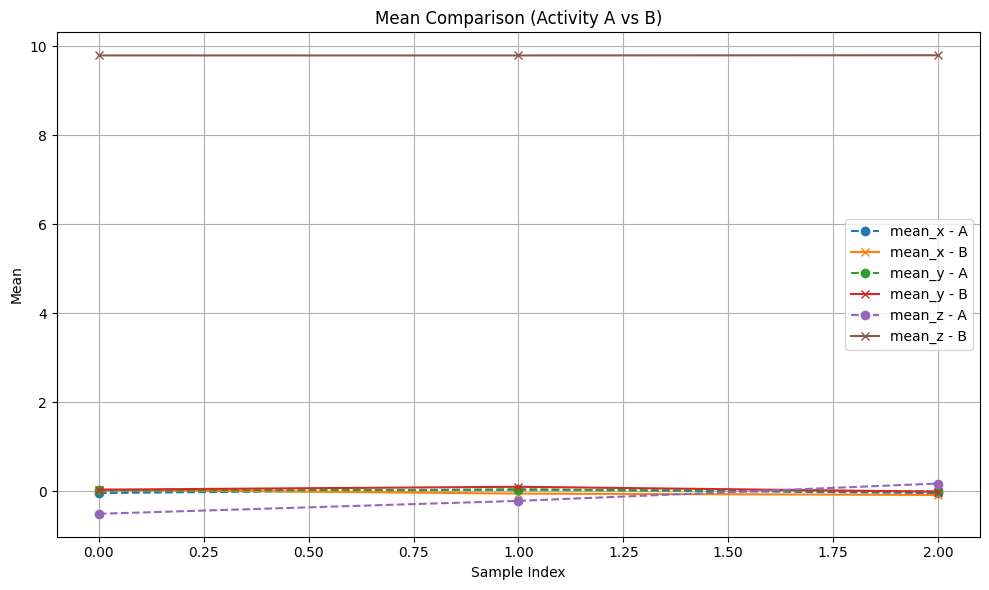

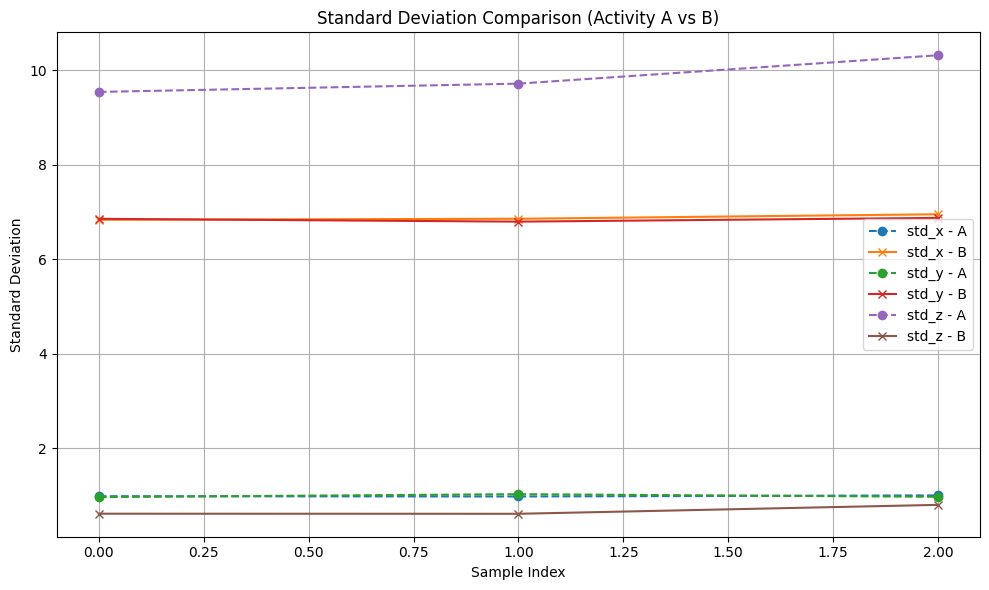

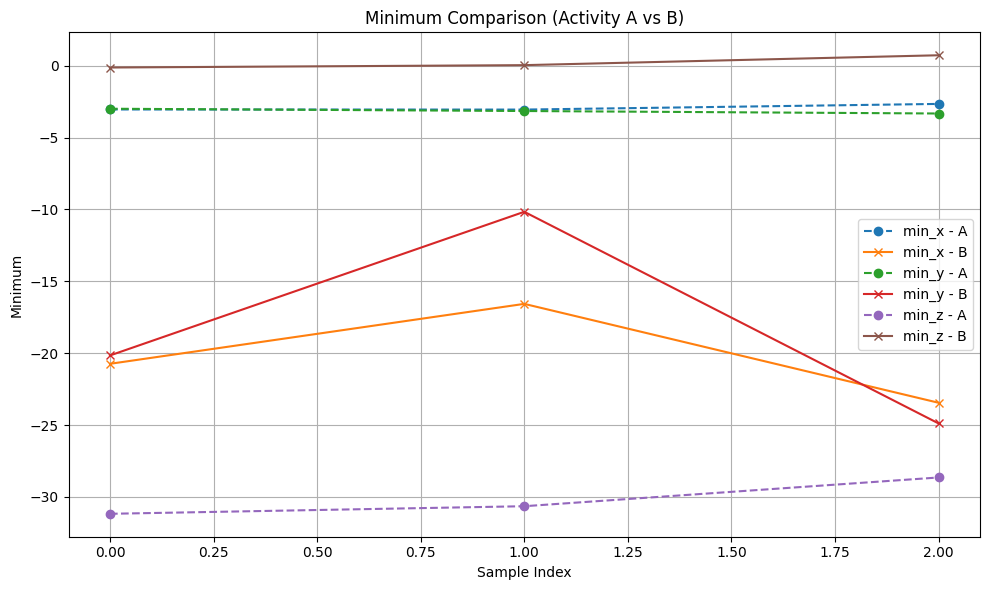

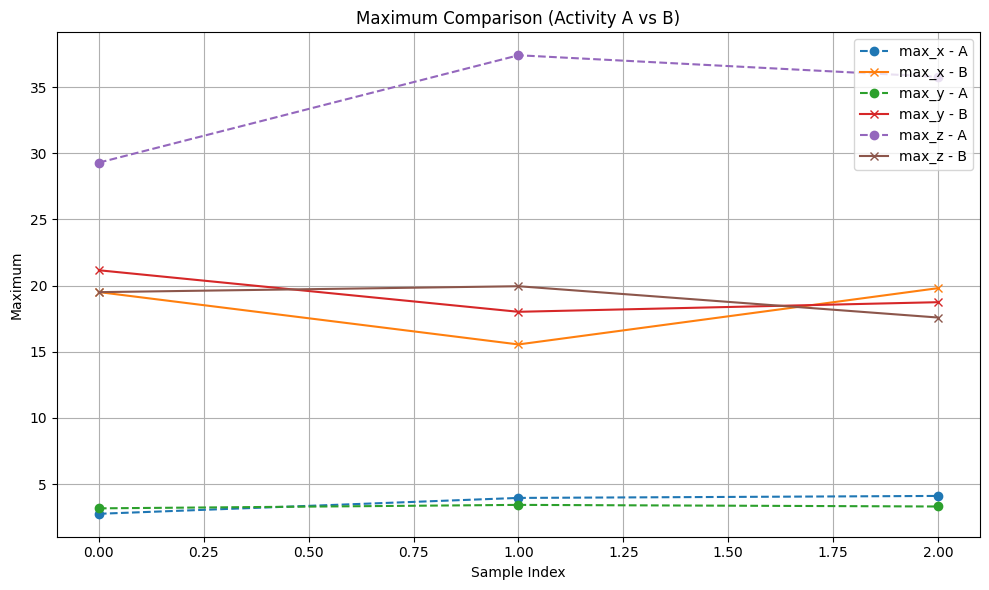

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your features.csv
df = pd.read_csv("/Users/dishasharma/Documents/Coding/SIT225/Task 8.1P/features.csv")

# Define the feature groups
feature_groups = {
    "Mean": ['mean_x', 'mean_y', 'mean_z'],
    "Standard Deviation": ['std_x', 'std_y', 'std_z'],
    "Minimum": ['min_x', 'min_y', 'min_z'],
    "Maximum": ['max_x', 'max_y', 'max_z']
}

# Plot each feature group
for title, features in feature_groups.items():
    plt.figure(figsize=(10, 6))
    
    for feature in features:
        # Separate line for Activity A and B
        plt.plot(df[df['label'] == 'A'][feature].values, label=f'{feature} - A', linestyle='--', marker='o')
        plt.plot(df[df['label'] == 'B'][feature].values, label=f'{feature} - B', linestyle='-', marker='x')
    
    plt.title(f'{title} Comparison (Activity A vs B)')
    plt.xlabel('Sample Index')
    plt.ylabel(title)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
